In [1]:
import enefit
env = enefit.make_env()
iter_test = env.iter_test()

ModuleNotFoundError: No module named 'enefit.competition'

In [2]:
# counter = 0
# for (test, revealed_targets, client, historical_weather,
#         forecast_weather, electricity_prices, gas_prices, sample_prediction) in iter_test:
#     if counter == 0:
#         print(test.head(3))
#         print(revealed_targets.head(3))
#         print(client.head(3))
#         print(historical_weather.head(3))
#         print(forecast_weather.head(3))
#         print(electricity_prices.head(3))
#         print(gas_prices.head(3))
#         print(sample_prediction.head(3))
#     sample_prediction['target'] = 0
#     env.predict(sample_prediction)
#     counter += 1

In [3]:
import pandas as pd

train = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/train.csv', header='infer')
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [4]:
client = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/client.csv', header='infer')
client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [5]:
g_money = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv', header='infer')
g_money.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [6]:
e_money = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv', header='infer')
e_money.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [7]:
# f_weather = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv', header='infer')
# f_weather.head()

In [8]:
# f_weather.head()

In [9]:
# h_weather = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv', header='infer')

In [10]:
# h_weather.head()

In [11]:
# stations = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv', header='infer')

In [12]:
# stations.describe()

In [13]:
#I hate dataetime
import datetime as dt

def convert_to_seconds(series):
    return (pd.to_datetime(series)).astype('int64')//1e9

In [14]:
train['datetime'] = convert_to_seconds(train['datetime'])
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,1.630454e+09,0,0,0
1,0,0,1,96.590,1,1.630454e+09,0,1,0
2,0,0,2,0.000,0,1.630454e+09,0,2,1
3,0,0,2,17.314,1,1.630454e+09,0,3,1
4,0,0,3,2.904,0,1.630454e+09,0,4,2


In [15]:
client['date'] = convert_to_seconds(client['date'])
client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,1.630454e+09,2
1,2,0,17,166.40,0,1.630454e+09,2
2,3,0,688,7207.88,0,1.630454e+09,2
3,0,0,5,400.00,1,1.630454e+09,2
4,1,0,43,1411.00,1,1.630454e+09,2


In [16]:
g_money['forecast_date'] = convert_to_seconds(g_money['forecast_date'])
g_money['origin_date'] = convert_to_seconds(g_money['origin_date'])
g_money.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,1.630454e+09,45.23,46.32,1.630368e+09,1
1,1.630541e+09,45.62,46.29,1.630454e+09,2
2,1.630627e+09,45.85,46.40,1.630541e+09,3
3,1.630714e+09,46.30,46.80,1.630627e+09,4
4,1.630800e+09,46.30,46.58,1.630714e+09,5


In [17]:
e_money['forecast_date'] = convert_to_seconds(e_money['forecast_date'])
e_money['origin_date'] = convert_to_seconds(e_money['origin_date'])
e_money.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,1.630454e+09,92.51,1.630368e+09,1
1,1.630458e+09,88.90,1.630372e+09,1
2,1.630462e+09,87.35,1.630375e+09,1
3,1.630465e+09,86.88,1.630379e+09,1
4,1.630469e+09,88.43,1.630382e+09,1


In [18]:
# f_weather['forecast_datetime'] = convert_to_seconds(f_weather['forecast_datetime'])
# f_weather['origin_datetime'] = convert_to_seconds(f_weather['origin_datetime'])
# f_weather.head()

In [19]:
# h_weather['datetime'] = convert_to_seconds(h_weather['datetime'])
# h_weather.head()

In [20]:
client['datetime'] = client['date']
client = client.drop(['date'], axis=1)
# g_money['datetime'] = g_moeny['origin_date']
# g_money = g_money.drop(['origin_date'], axis=1)
# e_money['datetime'] = e_money['origin_date']
# e_money = e_money.drop(['origin_date'], axis=1)

In [21]:
# lets join some things
merged = train.merge(client, on=['datetime', 'county', 'is_business', 'product_type'], how='left')
# merged = merged.merge(g_money)
merged.shape

(2018352, 12)

In [22]:
dropped = merged.dropna()
dropped.shape


(83838, 12)

In [23]:
# well the following cells will definetly make the kernel shit the bed without some downsampling

downsampled = dropped.sample(frac=0.01, random_state=42) 
downsampled.shape

(838, 12)

In [92]:
import plotly.express as px

scatter = px.scatter(dropped, x='installed_capacity', y='target', color='is_consumption', 
                     title='Installed Capacity vs. Target by Consumption', 
                     labels={'installed_capacity': 'Installed Capacity', 'target': 'Target'})
scatter.show()


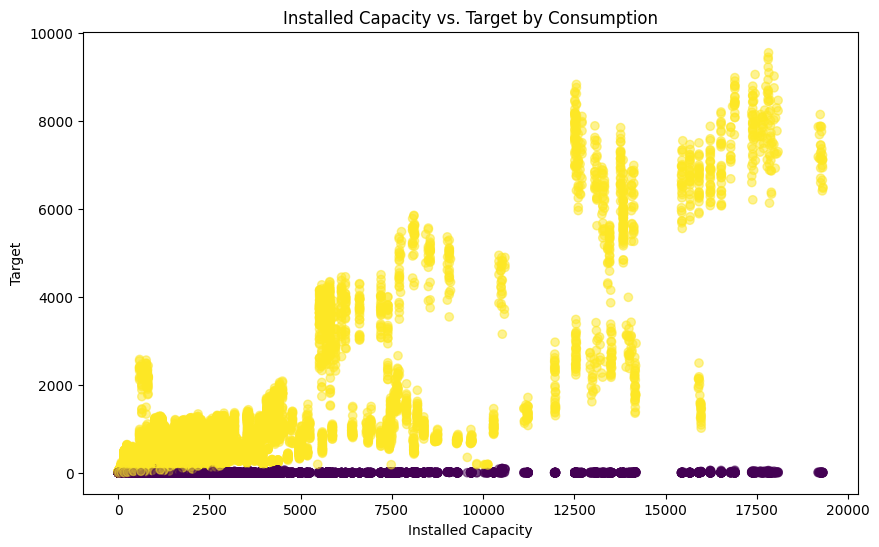

In [149]:
# Your data
x = dropped['installed_capacity']
y = dropped['target']
colors = dropped['is_consumption']  # Assuming this is binary or categorical

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)

# Add a title and labels
plt.title('Installed Capacity vs. Target by Consumption')
plt.xlabel('Installed Capacity')
plt.ylabel('Target')

# If 'is_consumption' is categorical, you can create a color bar
if dropped['is_consumption'].dtype == 'category':
    plt.colorbar(scatter)

# Save the figure as SVG
plt.savefig('scatter_plot.pdf', format='pdf')

# Show the plot
plt.show()

In [26]:
box = px.box(dropped, x='is_business', y='target', color='is_business', 
             title='Distribution of Target by Business Type', 
             labels={'is_business': 'Is Business', 'target': 'Target'})
box.show()

In [27]:
hist = px.histogram(dropped, x='eic_count', title='Distribution of EIC Counts', 
                    labels={'eic_count': 'EIC Count', 'count': 'Count'})
hist.show()

In [28]:
X = dropped.drop(['target'], axis=1)
y = dropped['target']

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# # Create an MLP Regressor instance
# mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# n_iterations = mlp.max_iter
# progress_percent = 0
# progress_interval = 10  # Update progress every 10%

# X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# losses = []
# for i in range(n_iterations):
#     mlp.partial_fit(X_train_part, y_train_part)
#     # Calculate loss for each iteration
#     losses.append(mlp.loss_)
    
#     # Update progress
#     new_progress = int((i + 1) / n_iterations * 100)
#     if new_progress >= progress_percent + progress_interval:
#         progress_percent = new_progress
#         print(f"Training progress: {progress_percent}%")


In [31]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.plot(losses, label='Training Loss')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.title('Training Loss over Iterations')
# plt.legend()
# plt.show()

In [32]:
# #ok lets infer and see

# y_pred_mlp = mlp.predict(X_test_scaled)
# r2 = mlp.score(X_test_scaled, y_test)
# mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
# print(f"R2 score is {r2}\nmae is {mae_mlp}")

In [33]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set parameters for XGBoost regressor
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost regressor
xgb_reg = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred_xgb = xgb_reg.predict(dtest)

# Evaluate the XGBoost regressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}\nMean Absolute Error {mae_xgb}")


Mean Squared Error (XGBoost): 7956.01715770858
Mean Absolute Error 33.69538425450951


In [34]:
def preprocess(test, client):
    test['datetime'] = convert_to_seconds(test['prediction_datetime'])
    test = test.drop(['prediction_datetime'], axis=1)
    client['date'] = convert_to_seconds(client['date'])
    client['datetime'] = client['date']
    client = client.drop(['date'], axis=1)
    merged = test.merge(client, on=['datetime', 'county', 'is_business', 'product_type'], how='left')
    droped = merged.dropna(how='any', axis=1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(droped)
    return scaled

In [35]:
counter = 0
for (test, revealed_targets, client, historical_weather,
        forecast_weather, electricity_prices, gas_prices, sample_prediction) in iter_test:
    
    if counter == 0:
        print(test.head(3))
        print(revealed_targets.head(3))
        print(client.head(3))
        print(historical_weather.head(3))
        print(forecast_weather.head(3))
        print(electricity_prices.head(3))
        print(gas_prices.head(3))
        print(sample_prediction.head(3))
    
    test_data = preprocess(test, client)
    dtest = xgb.DMatrix(test_data)
    predictions = xgb_reg.predict(dtest)
    if len(predictions) != len(sample_prediction):
        print(f"Mismatch in length: Predictions length {len(predictions)}, Sample_prediction length {len(sample_prediction)}")
    sample_prediction['target'] = predictions
    env.predict(sample_prediction)
    counter += 1

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
   county  is_business  product_type  is_consumption prediction_datetime  \
0       0        False             1           False          2023-05-28   
1       0        False             1            True          2023-05-28   
2       0        False             2           False          2023-05-28   

    row_id  prediction_unit_id  currently_scored  
0  2005872                   0             False  
1  2005873                   0             False  
2  2005874                   1             False  
   county  is_business  product_type   target  is_consumption   datetime  \
0       0        False             1    2.675           False 2023-05-26   
1       0        False             1  471.887            True 2023-05-26   
2       0        False             2    0.000           False 2023-05-26   

    row_id  prediction_unit_id  
0  1999536                  

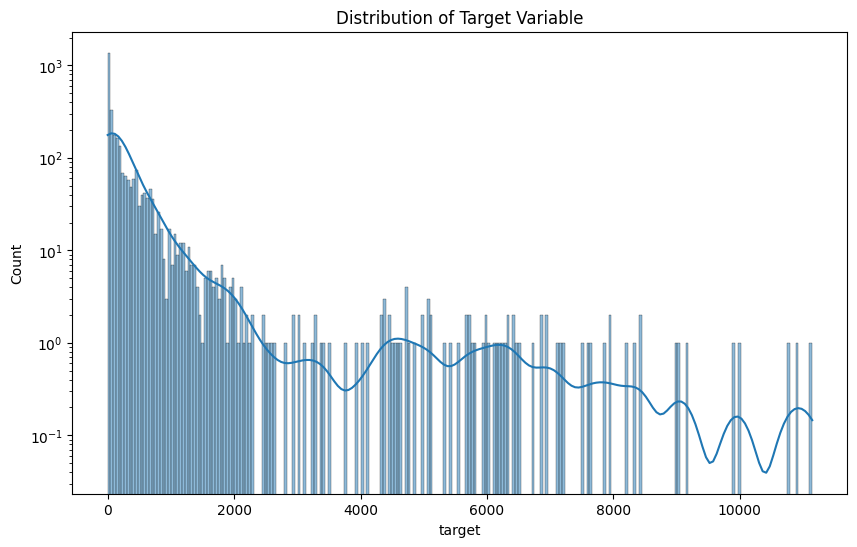

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'train' is your training dataset with a column 'target'
# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(revealed_targets['target'], kde=True)
plt.yscale('log')
plt.title('Distribution of Target Variable')
plt.savefig('target_dist.svg', format='svg')
plt.show()


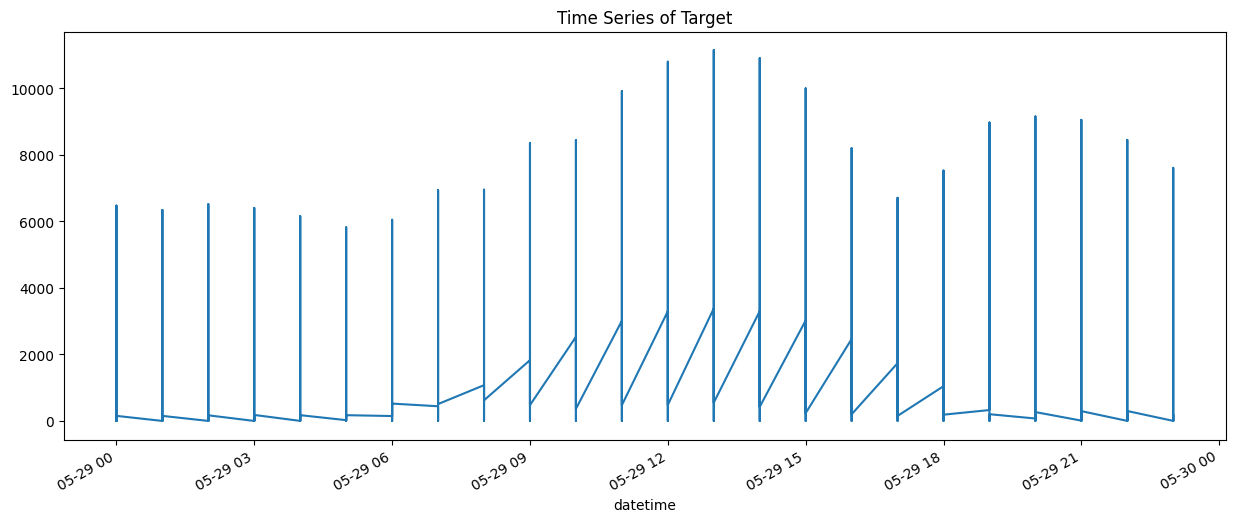

In [89]:
revealed_targets['datetime'] = pd.to_datetime(revealed_targets['datetime'], unit='s')  # Converting to datetime if needed
revealed_targets.set_index('datetime')['target'].plot(figsize=(15, 6))
plt.title('Time Series of Target')
plt.show()

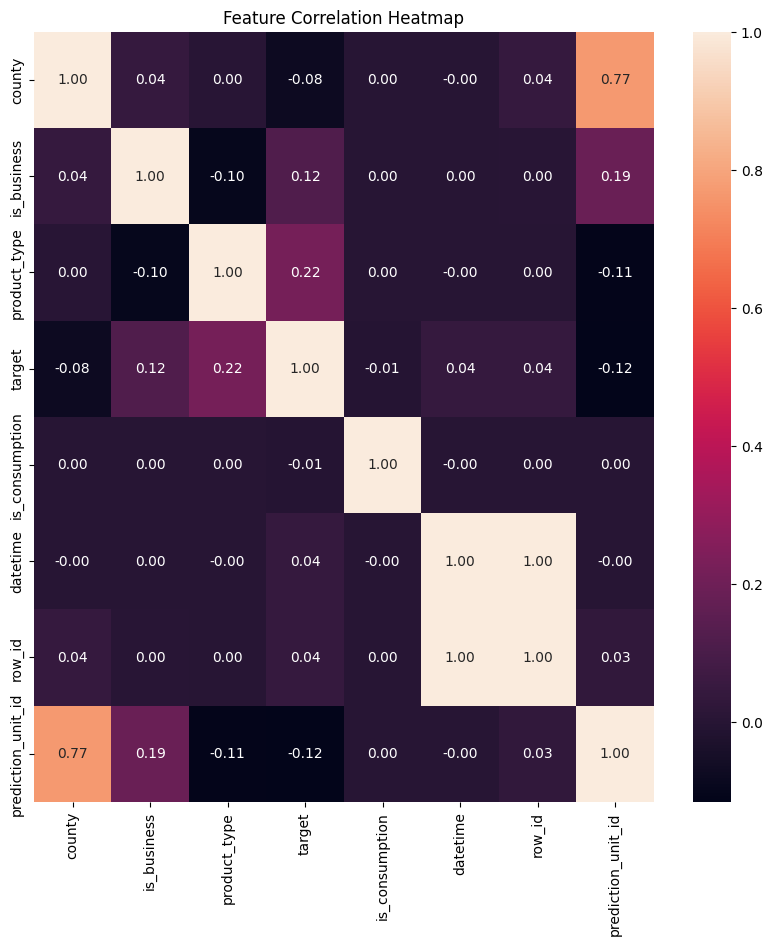

In [157]:
plt.figure(figsize=(10, 10))
sns.heatmap(revealed_targets.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.savefig('corr_mtrx.svg', format='svg')
plt.show()


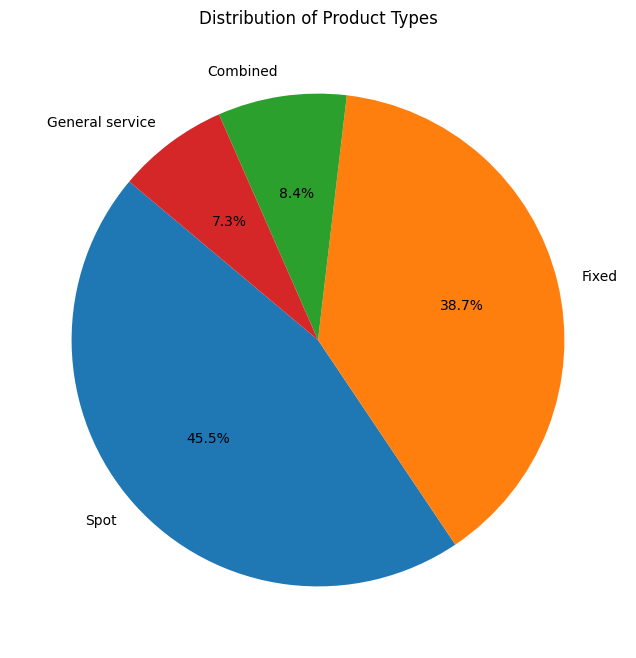

In [156]:
product_type_counts = train['product_type'].value_counts()
product_type_labels = ['Combined', 'Fixed', 'General service', 'Spot']

pie_labels = [product_type_labels[index] for index in product_type_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(product_type_counts, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Types')
plt.savefig('dist_of_prods.svg', format='svg')
plt.show()


In [123]:
train = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/train.csv', header='infer')
client = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/client.csv', header='infer')
g_money = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv', header='infer')
e_money = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv', header='infer')


In [124]:
train['datetime'] = pd.to_datetime(train['datetime'])
e_money['forecast_date'] = pd.to_datetime(e_money['forecast_date'])
g_money['forecast_date'] = pd.to_datetime(g_money['forecast_date'])
client['date'] = pd.to_datetime(client['date'])

In [125]:
train['date'] = train['datetime'].dt.date
client['date'] = pd.to_datetime(client['date']).dt.date
merged_data = train.merge(client, on=['county', 'is_business', 'product_type', 'date'], how='left')

In [126]:
e_money = e_money.drop('data_block_id', axis=1)
g_money = g_money.drop('data_block_id', axis=1)

merged_data = merged_data.merge(e_money, left_on='datetime', right_on='forecast_date', how='left')
merged_data = merged_data.merge(g_money, left_on='datetime', right_on='forecast_date', how='left')

In [117]:
print(merged_data.columns)

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id_x', 'row_id', 'prediction_unit_id', 'date',
       'eic_count', 'installed_capacity', 'data_block_id_y', 'forecast_date_x',
       'euros_per_mwh', 'origin_date_x', 'forecast_date_y',
       'lowest_price_per_mwh', 'highest_price_per_mwh', 'origin_date_y'],
      dtype='object')


In [69]:
downsampled = merged_data.sample(frac=0.01, random_state=42) 
downsampled.shape

(20184, 20)

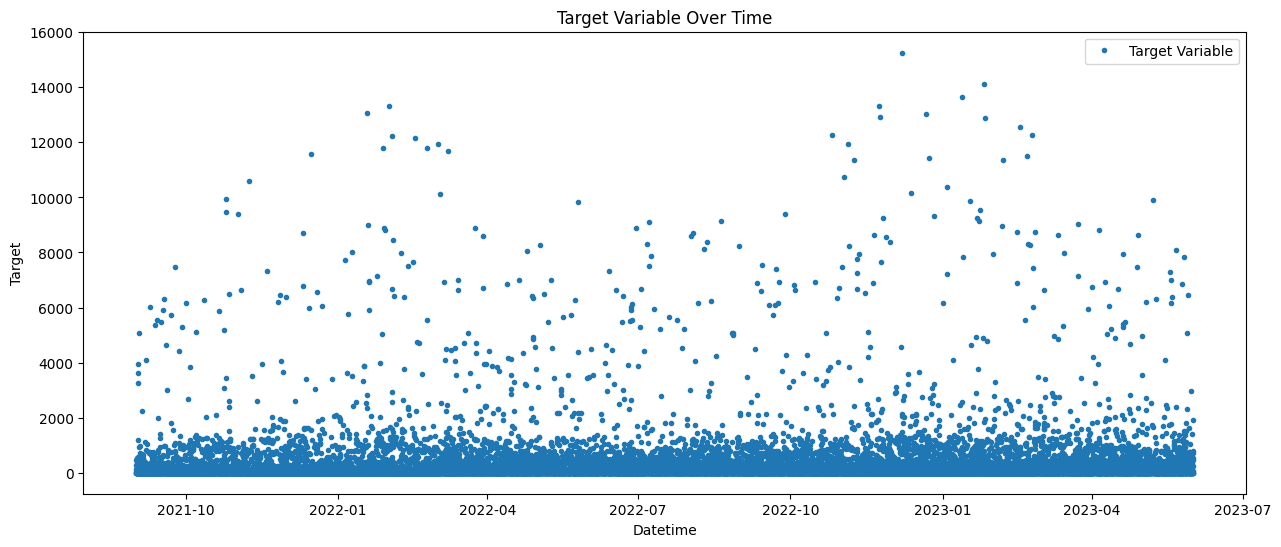

In [72]:
plt.figure(figsize=(15, 6))
plt.plot(downsampled['datetime'], downsampled['target'], '.', label='Target Variable',)
plt.xlabel('Datetime')
plt.ylabel('Target')
plt.title('Target Variable Over Time')
plt.legend()
plt.show()

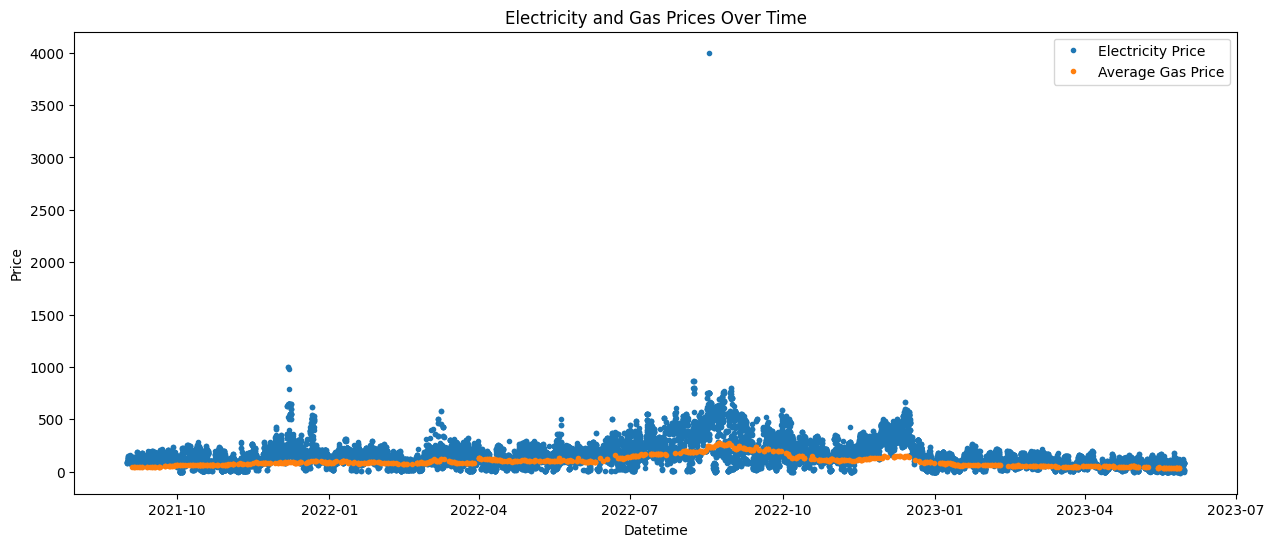

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(downsampled['datetime'], downsampled['euros_per_mwh'], '.', label='Electricity Price')
plt.plot(downsampled['datetime'], (downsampled['lowest_price_per_mwh'] + downsampled['highest_price_per_mwh'])/2, '.', label='Average Gas Price')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Electricity and Gas Prices Over Time')
plt.legend()
plt.show()

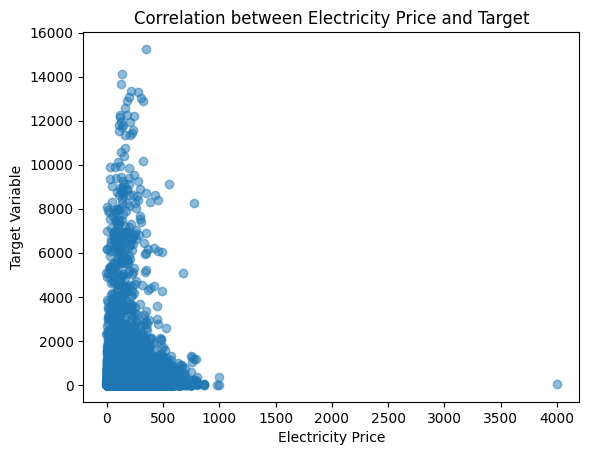

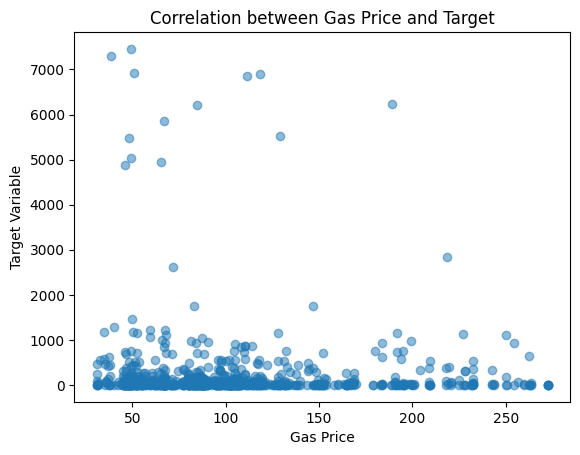

In [159]:
plt.scatter(downsampled['euros_per_mwh'], downsampled['target'], alpha=0.5)
plt.xlabel('Electricity Price')
plt.ylabel('Target Variable')
plt.title('Correlation between Electricity Price and Target')
plt.show()

plt.scatter((downsampled['lowest_price_per_mwh'] + downsampled['highest_price_per_mwh'])/2, downsampled['target'], alpha=0.5)
plt.xlabel('Gas Price')
plt.ylabel('Target Variable')
plt.title('Correlation between Gas Price and Target')
plt.savefig('correlations.svg', format='svg')
plt.show()


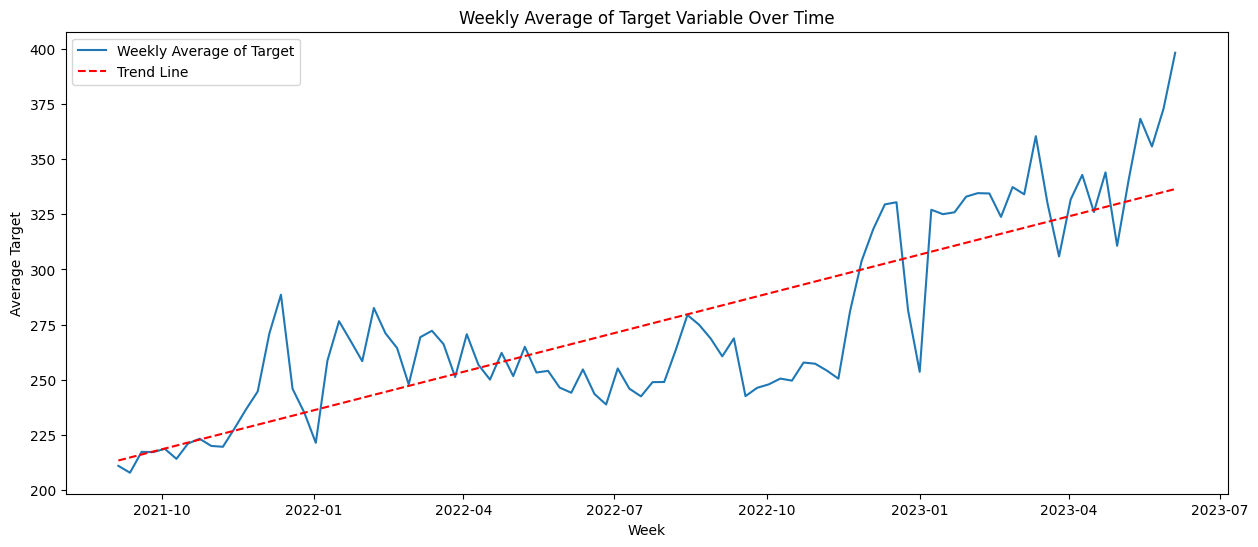

In [153]:
# merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])
# merged_data.set_index('datetime', inplace=True)

# Resample data to weekly frequency and calculate mean
weekly_data = merged_data['target'].resample('W').mean()

x = np.arange(len(weekly_data))
y = weekly_data.values
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(15, 6))
plt.plot(weekly_data, label='Weekly Average of Target')
plt.plot(weekly_data.index, m*x + b, color='red', linestyle='--', label='Trend Line')
plt.xlabel('Week')
plt.ylabel('Average Target')
plt.title('Weekly Average of Target Variable Over Time')
plt.legend()
plt.savefig('Target_trend.svg', format='svg')
plt.show()


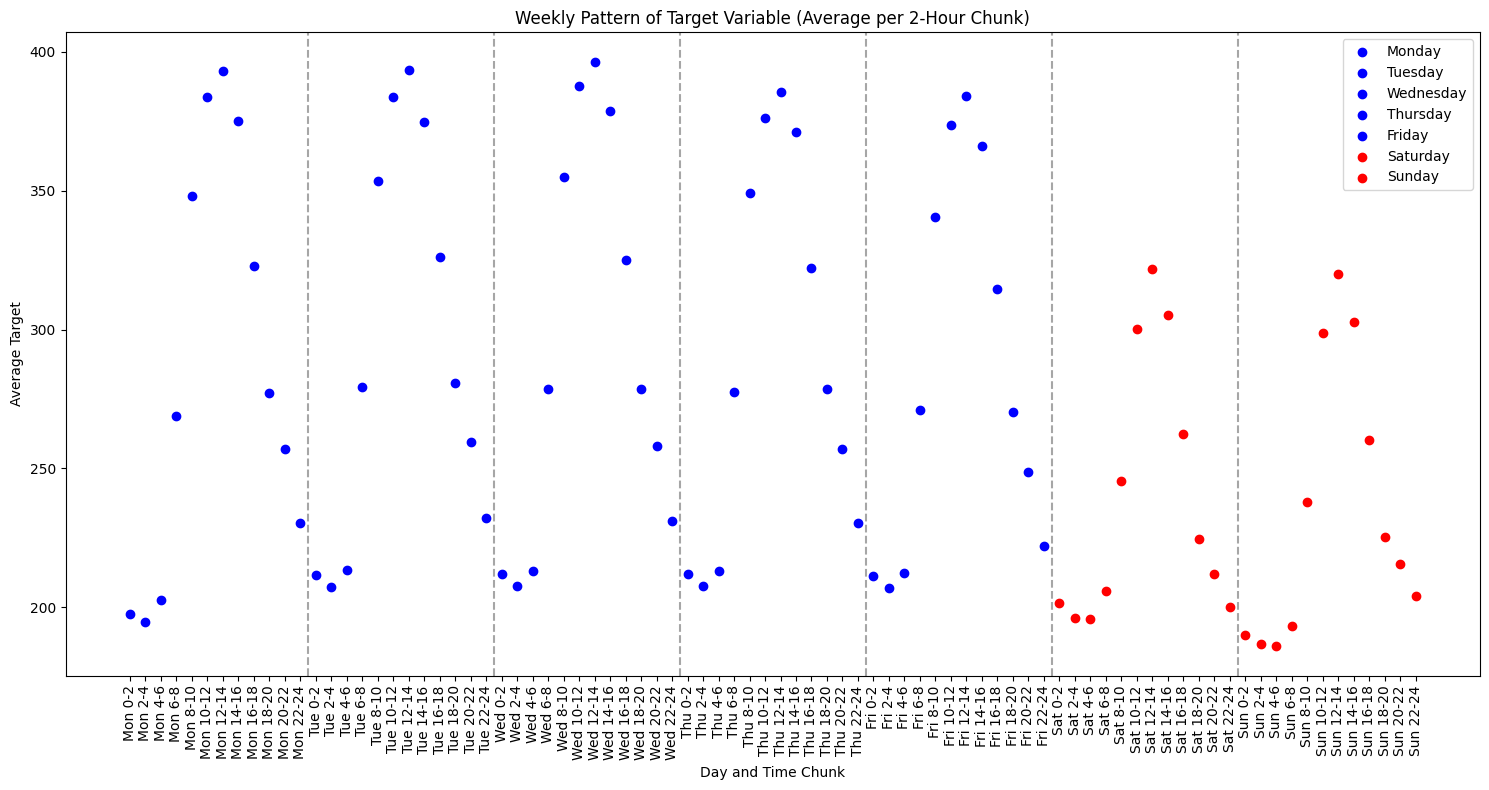

In [152]:
# Assuming 'merged_data' has a datetime index
merged_data['day_of_week'] = merged_data.index.day_name()
merged_data['time_of_day'] = merged_data.index.hour
merged_data['2h_chunk'] = merged_data['time_of_day'] // 2

# Group by day of the week and 4-hour chunk
grouped_data = merged_data.groupby(['day_of_week', '2h_chunk'])['target'].mean()

# Creating the plot
plt.figure(figsize=(15, 8))

# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Colors for weekend (Saturday and Sunday)
weekend_color = 'red'
weekday_color = 'blue'

for day in days_order:
    day_data = grouped_data[day]
    x_values = np.arange(len(day_data)) + days_order.index(day) * len(day_data)
    plt.scatter(x_values, day_data, label=day, color=weekend_color if day in ['Saturday', 'Sunday'] else weekday_color)

for i in range(1, 7):
    plt.axvline(i * 12 - 0.5, linestyle='--', color='grey', alpha=0.7)

# Customizing x-ticks to show day and 4-hour chunk
x_ticks_labels = []
for day in days_order:
    for chunk in range(12):
        x_ticks_labels.append(f"{day[:3]} {chunk*2}-{(chunk+1)*2}")

plt.xticks(ticks=np.arange(0, 84, 1), labels=x_ticks_labels, rotation=90)
plt.xlabel('Day and Time Chunk')
plt.ylabel('Average Target')
plt.title('Weekly Pattern of Target Variable (Average per 2-Hour Chunk)')
plt.legend()
plt.tight_layout()
plt.savefig('weekly_pattern.svg', format='svg')
plt.show()


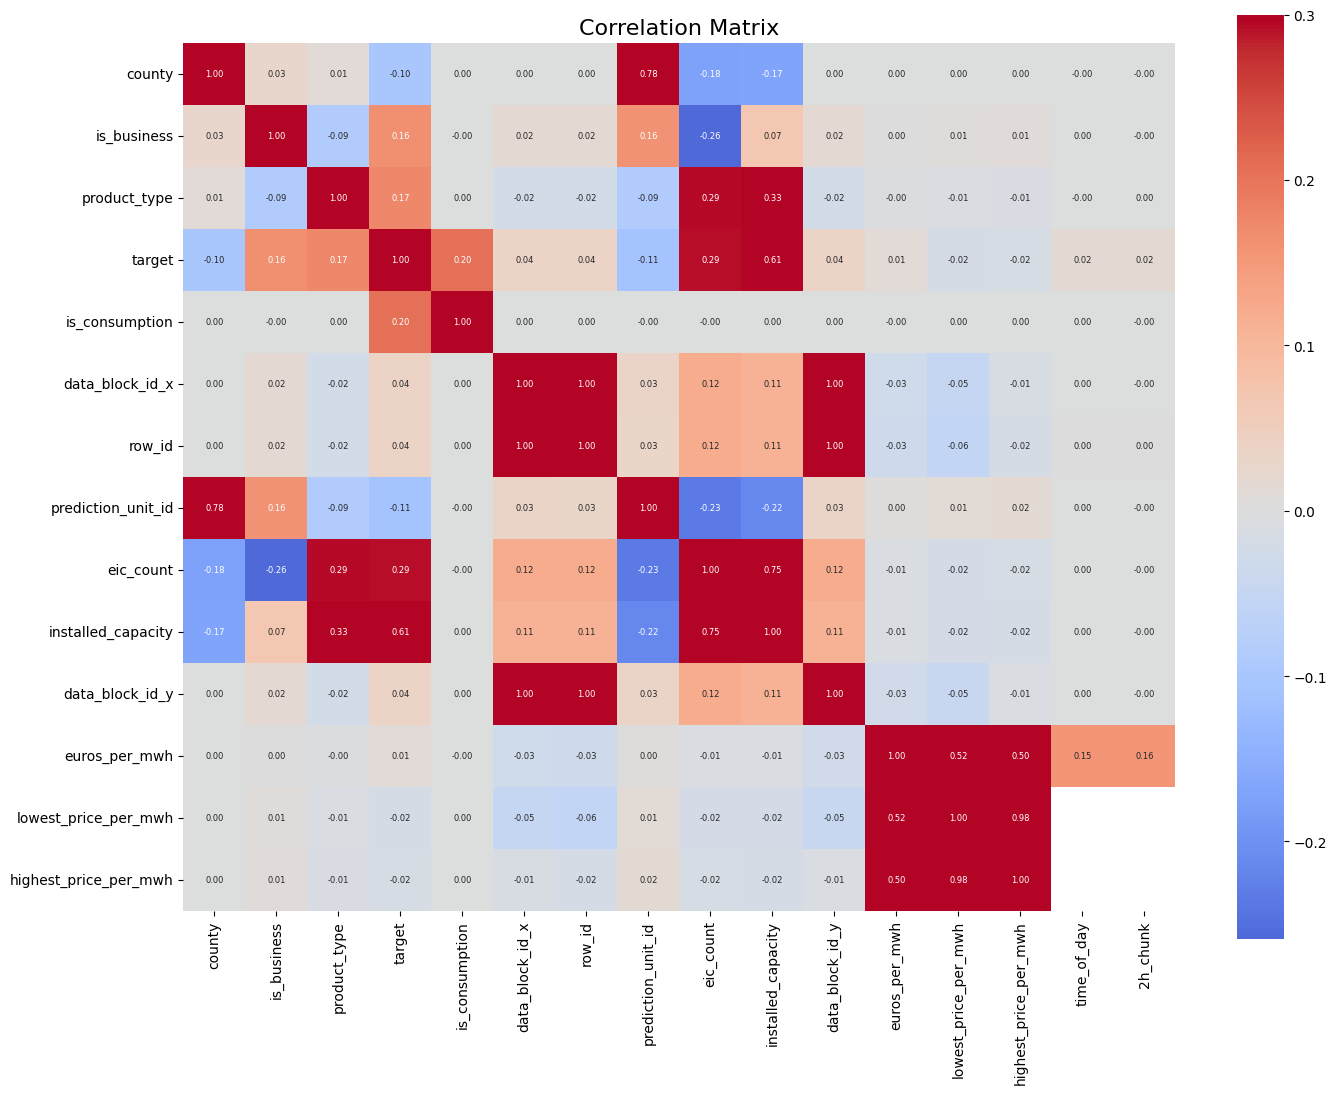

In [145]:
corr = merged_data.select_dtypes(include=[np.number]).corr()
corr = corr.drop(['2h_chunk', 'time_of_day'])
plt.figure(figsize=(16, 12))
# mask = np.triu(np.ones_like(corr, dtype=bool))
# mask_nan = np.isnan(corr)
# final_mask = mask | mask_nan

sns.heatmap(corr, cmap='coolwarm', vmax=.3, center=0,
            square=True, annot=True, fmt=".2f", annot_kws={'size': 6})

plt.title('Correlation Matrix', fontsize=16)

plt.show()
